In [315]:
%matplotlib inline

In [316]:
import requests
import json
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [317]:
base_url= "https://data.cityofnewyork.us/resource/uvbq-3m68.json"

In [318]:
client = Socrata("data.cityofnewyork.us", "Aig7X0m1zpKVCx0jkYnDa1yAB")

In [319]:
results = client.get("uvbq-3m68", limit=12000000, where="issue_date like '%/2018'")

In [321]:
results_df = pd.DataFrame.from_records(results)

In [322]:
#Filter the dataset so that the ones without violation status are dropped

results_df2= results_df.dropna(subset=['violation_status'])
results_df2

,amount_due,county,fine_amount,interest_amount,issue_date,issuing_agency,judgment_entry_date,license_type,payment_amount,penalty_amount,plate,precinct,reduction_amount,state,summons_image,summons_number,violation,violation_status,violation_time
1,0,NY,115,0,06/26/2018,TRAFFIC,NaN,COM,0,0,17728MJ,032,115,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8636528963,DOUBLE PARKING,HEARING HELD-NOT GUILTY,11:49A
8,0,NY,115,0,02/20/2018,TRAFFIC,NaN,PAS,115,0,HMM9632,023,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8642101556,NO STANDING-DAY/TIME LIMITS,HEARING HELD-GUILTY,12:51P
13,0,K,65,0,02/13/2018,TRAFFIC,NaN,PAS,65,0,HAU2290,090,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8594518330,INSP. STICKER-EXPIRED/MISSING,HEARING HELD-GUILTY,02:17P
26,0,BX,45,0,06/28/2018,TRAFFIC,NaN,COM,45,0,22380ME,049,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8605587118,NO PARKING-STREET CLEANING,HEARING HELD-GUILTY REDUCTION,11:41A
43,0,BX,35,0,02/28/2018,TRAFFIC,NaN,PAS,0,0,HPJ5748,046,35,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8592820728,FAIL TO DSPLY MUNI METER RECPT,HEARING HELD-NOT GUILTY,01:06P
51,0,BX,115,0,03/06/2018,TRAFFIC,NaN,CMB,0,10,K89978,052,125,CT,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597492170,NO STANDING-BUS STOP,APPEAL REVERSED,12:32P
59,79.87,MN,50,4.87,07/01/2018,DEPARTMENT OF TRANSPORTATION,11/29/2018,PAS,0,25,HVK8508,000,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,5102280910,FAILURE TO STOP AT RED LIGHT,HEARING HELD-GUILTY,05:23P
68,0,BX,35,0,03/01/2018,TRAFFIC,NaN,PAS,0,0,HJY8331,050,35,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8592821022,FAIL TO DSPLY MUNI METER RECPT,HEARING HELD-NOT GUILTY,03:09P
78,0,BX,115,0,08/23/2018,TRAFFIC,NaN,PAS,0,0,HNU1367,049,115,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8602629667,FIRE HYDRANT,HEARING HELD-NOT GUILTY,10:45A
83,0,BX,35,0,03/08/2018,TRAFFIC,NaN,PAS,45,10,HAB6875,049,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597492697,FAIL TO DSPLY MUNI METER RECPT,HEARING HELD-GUILTY,02:46P


## Examining the relationship between state license plate vs violation status

In [323]:
#Finding all types of violation types
results_df2["violation_status"].unique()

array(['HEARING HELD-NOT GUILTY', 'HEARING HELD-GUILTY',
       'HEARING HELD-GUILTY REDUCTION', 'APPEAL REVERSED',
       'APPEAL AFFIRMED', 'ADMIN CLAIM GRANTED', 'HEARING ADJOURNMENT',
       'ADMIN CLAIM DENIED', 'ADMIN REDUCTION', 'HEARING PENDING',
       'APPEAL ABANDONED', 'HEARING HELD-REINSTATEMENT',
       'APPEAL MODIFIED', 'APPEAL REMANDED'], dtype=object)

In [324]:
#Drop and filter the dataset even further because we're only concerend with the initial decision of the court
results3=results_df2[results_df2.violation_status != ("HEARING ADJOURNMENT", "HEARING PENDING", "ADMIN CLAIM DENIED",
                                                      "APPEAL AFFIRMED", "ADMIN REDUCTION", "APPEAL REVERSED",
                                                      "ADMIN CLAIM GRANTED", "APPEAL ABANDONED", "HEARING HELD-REINSTATEMENT",
                                                      "APPEAL REMANDED", "APPEAL MODIFIED", "HEARING WAIVED")]
results3

,amount_due,county,fine_amount,interest_amount,issue_date,issuing_agency,judgment_entry_date,license_type,payment_amount,penalty_amount,plate,precinct,reduction_amount,state,summons_image,summons_number,violation,violation_status,violation_time
1,0,NY,115,0,06/26/2018,TRAFFIC,NaN,COM,0,0,17728MJ,032,115,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8636528963,DOUBLE PARKING,HEARING HELD-NOT GUILTY,11:49A
8,0,NY,115,0,02/20/2018,TRAFFIC,NaN,PAS,115,0,HMM9632,023,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8642101556,NO STANDING-DAY/TIME LIMITS,HEARING HELD-GUILTY,12:51P
13,0,K,65,0,02/13/2018,TRAFFIC,NaN,PAS,65,0,HAU2290,090,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8594518330,INSP. STICKER-EXPIRED/MISSING,HEARING HELD-GUILTY,02:17P
26,0,BX,45,0,06/28/2018,TRAFFIC,NaN,COM,45,0,22380ME,049,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8605587118,NO PARKING-STREET CLEANING,HEARING HELD-GUILTY REDUCTION,11:41A
43,0,BX,35,0,02/28/2018,TRAFFIC,NaN,PAS,0,0,HPJ5748,046,35,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8592820728,FAIL TO DSPLY MUNI METER RECPT,HEARING HELD-NOT GUILTY,01:06P
51,0,BX,115,0,03/06/2018,TRAFFIC,NaN,CMB,0,10,K89978,052,125,CT,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597492170,NO STANDING-BUS STOP,APPEAL REVERSED,12:32P
59,79.87,MN,50,4.87,07/01/2018,DEPARTMENT OF TRANSPORTATION,11/29/2018,PAS,0,25,HVK8508,000,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,5102280910,FAILURE TO STOP AT RED LIGHT,HEARING HELD-GUILTY,05:23P
68,0,BX,35,0,03/01/2018,TRAFFIC,NaN,PAS,0,0,HJY8331,050,35,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8592821022,FAIL TO DSPLY MUNI METER RECPT,HEARING HELD-NOT GUILTY,03:09P
78,0,BX,115,0,08/23/2018,TRAFFIC,NaN,PAS,0,0,HNU1367,049,115,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8602629667,FIRE HYDRANT,HEARING HELD-NOT GUILTY,10:45A
83,0,BX,35,0,03/08/2018,TRAFFIC,NaN,PAS,45,10,HAB6875,049,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597492697,FAIL TO DSPLY MUNI METER RECPT,HEARING HELD-GUILTY,02:46P


In [325]:
#NY Drivers
ny_drivers=results3[results3["state"]=="NY"]
#Out of State Drivers
out_of_state_drivers=results3[results3["state"]!="NY"]

In [326]:
#Guilty NY drivers
guilty=results3[(results3["violation_status"]=="HEARING HELD-GUILTY") & (results3["state"]=="NY")]

#Not guilty NY drivers
not_guilty=results3[(results3["violation_status"]=="HEARING HELD-NOT GUILTY") & (results3["state"]=="NY")] 

#Finding the total number of guilty and not guilty for NY drivers
guilty_count= len(guilty.index)
not_guilty_count= len(not_guilty.index)

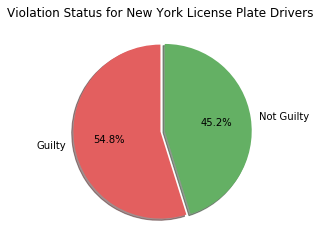

In [327]:
#Pie chart for NY drivers who had a hearing
labels=["Guilty","Not Guilty"]
ny_sizes=[guilty_count,not_guilty_count]
colors=["#e35f5f","#64b064"]
explode = (0, 0.05)

plt.pie(ny_sizes, shadow=True, startangle=90, explode=explode, labels=labels, colors=colors, autopct='%.1f%%')
plt.title("Violation Status for New York License Plate Drivers")

plt.savefig("New York License Plate Drivers Violation Status")

In [328]:
#Out-of-State drivers
oos_guilty=results3[(results3["violation_status"]=="HEARING HELD-GUILTY") & (results3["state"]!="NY")]

#Out-of-State drivers
oos_not_guilty=results3[(results3["violation_status"]=="HEARING HELD-NOT GUILTY") & (results3["state"]!="NY")]

#Finding the total number of guilty and not guilty for Out-of-State drivers
oos_guilty_count= len(oos_guilty.index)
oos_not_guilty_count= len(oos_not_guilty.index)

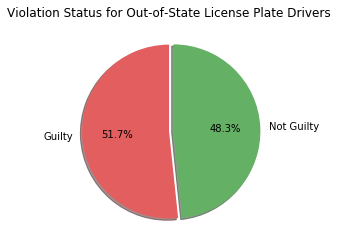

In [329]:
#Pie chart for Out-of-State drivers who had a hearing
oos_labels=["Guilty","Not Guilty"]
oos_sizes=[oos_guilty_count,oos_not_guilty_count]
colors=["#e35f5f","#64b064"]
explode = (0, 0.05)

plt.pie(oos_sizes, shadow=True, startangle=90, explode=explode, labels=oos_labels, colors=colors, autopct='%.1f%%')
plt.title("Violation Status for Out-of-State License Plate Drivers")

plt.savefig("Out-of-State License Plate Drivers Violation Status")

In [330]:
#NY drivers who were guilty but had their fine reduced 
guilty_reduction=results3[(results3["violation_status"]=="HEARING HELD-GUILTY REDUCTION") & (results3["state"]=="NY")]
#Out-of-State drivers who were guilty but had their fine reduced
oos_guilty_reduction=results3[(results3["violation_status"]=="HEARING HELD-GUILTY REDUCTION") & (results3["state"]!="NY")]

In [331]:
#Finding the total number of drivers who had their fines reduced
ny_fine_reduced_count= len(guilty_reduction.index)
oos_fine_reduced_count= len(oos_guilty_reduction.index)

In [332]:
#Percentage of guilty NY drivers who got their fine reduced
percentage_of_fine_reduced_ny_drivers=ny_fine_reduced_count/(guilty_count+ny_fine_reduced_count)
percentage_of_fine_reduced_ny_drivers

0.46943510108033193

In [333]:
#Percentage of guilty Out-of-State drivers who got their fine reduced
percentage_of_fine_reduced_oos_drivers=oos_fine_reduced_count/(oos_guilty_count+oos_fine_reduced_count)
percentage_of_fine_reduced_oos_drivers

0.24409706984650617

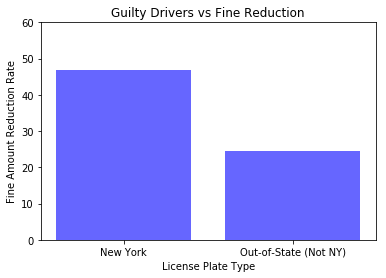

In [335]:
#Bar graph showing the percentage of drivers who got their fine reduced respective to their license plate state
users = [46.94,24.40]
x_axis = np.arange(len(users))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["New York", "Out-of-State (Not NY)"])

plt.bar(x_axis, users, color="blue", alpha= .6, align="center")
plt.title("Guilty Drivers vs Fine Reduction")
plt.xlabel("License Plate Type")
plt.ylabel("Fine Amount Reduction Rate")
plt.ylim(0,60)

plt.savefig("Fine Reduction Rate per State License Type")